#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
df = pd.read_csv('/Users/hpourmand/Desktop/All3/Coursera/Customer Shopping Trend/Shopping.csv')

#### Basic Information

In [10]:
# The first few rows of the dataset
print(df.head())

# The structure of the dataset
print(df.info())

# Summary statistics
print(df.describe())

print(df.columns)

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

### Descriptive Statistic

##### Number of each item purchased by each gender

In [11]:
if 'Gender' in df.columns and 'Item Purchased' in df.columns:
    gender_item_counts = df.groupby(['Item Purchased', 'Gender']).size().unstack(fill_value=0)   # Group by both Gender and Item Purchased, then count the occurrences
    print("Number of each item purchased by each gender:")
    print(gender_item_counts)
else:
    print("The columns 'Gender' and/or 'Item Purchased' were not found in the dataset.")

Number of each item purchased by each gender:
Gender          Female  Male
Item Purchased              
Backpack            37   106
Belt                55   106
Blouse              66   105
Boots               50    94
Coat                47   114
Dress               52   114
Gloves              37   103
Handbag             58    95
Hat                 52   102
Hoodie              51   100
Jacket              54   109
Jeans               29    95
Jewelry             52   119
Pants               48   123
Sandals             59   101
Scarf               45   112
Shirt               59   110
Shoes               48   102
Shorts              48   109
Skirt               49   109
Sneakers            42   103
Socks               58   101
Sunglasses          56   105
Sweater             50   114
T-shirt             46   101


##### Frequency and percentage of each gender

In [12]:
print(df['Gender'].value_counts())
print(df['Gender'].value_counts(normalize=True) * 100)

Gender
Male      2652
Female    1248
Name: count, dtype: int64
Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64


##### Frequency distribution of items purchased, top 5 most purchased items

In [13]:
print(df['Item Purchased'].value_counts().head(5))

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64


##### Frequency distribution of product categories

In [14]:
print(df['Category'].value_counts())

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


##### Top 5 locations where purchases are made

In [15]:
print(df['Location'].value_counts().head(5))

Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64


##### Distribution of sizes purchased

In [16]:
print(df['Size'].value_counts())

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64


##### Frequency distribution of product colors

In [17]:
print(df['Color'].value_counts().head(5))

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64


##### Distribution of purchases by season

In [18]:
print(df['Season'].value_counts())

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


##### Frequency of subscription statuses

In [19]:
print(df['Subscription Status'].value_counts())

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


##### Distribution of shipping types chosen by customers

In [14]:
print(df['Shipping Type'].value_counts())

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


##### Count and percentage of transactions where discounts and promo codes were used

In [15]:
print(df['Discount Applied'].value_counts())
print(df['Promo Code Used'].value_counts())

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64
Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64


##### Frequency of different payment methods

In [16]:
print(df['Payment Method'].value_counts())

Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


##### Distribution of how often customers make purchases

In [17]:
print(df['Frequency of Purchases'].value_counts())

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


#### Numerical Columns: 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'

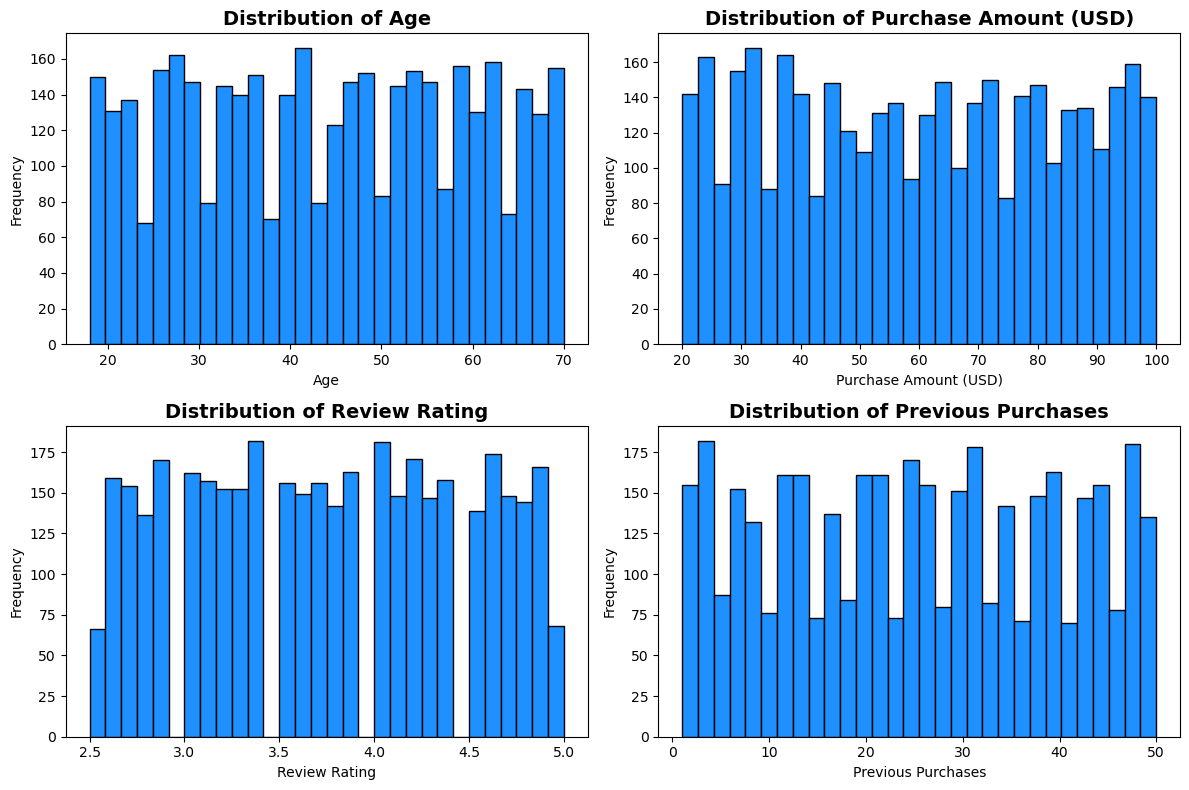

In [22]:
# Set a consistent color palette
color_palette = 'Set1'  # You can choose from available palettes or create a custom one

# Distribution of Numerical Variables
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    ax = df[col].plot(kind='hist', bins=30, color='dodgerblue', edgecolor='black')
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()


#### Categorical Columns: 'Gender', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases'

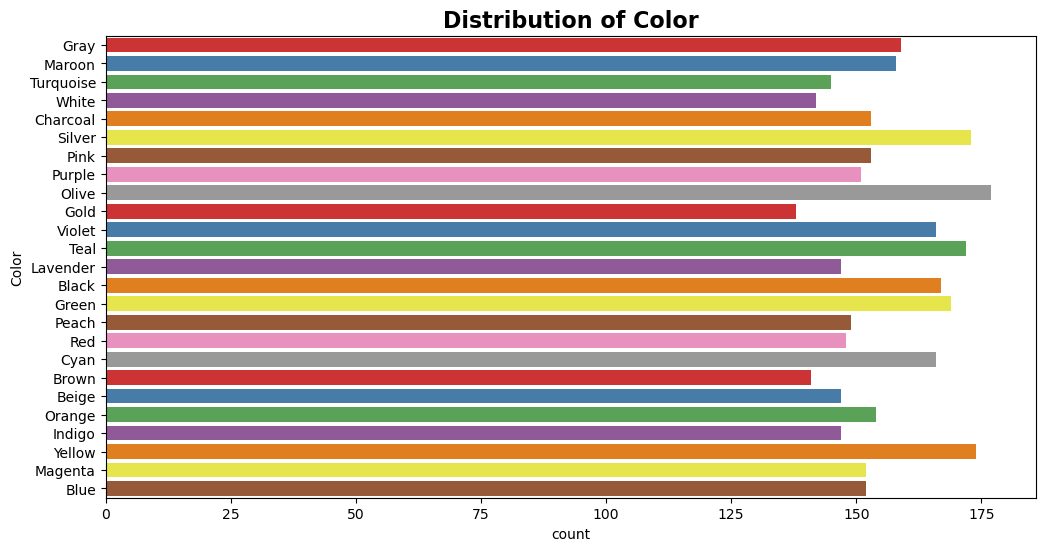

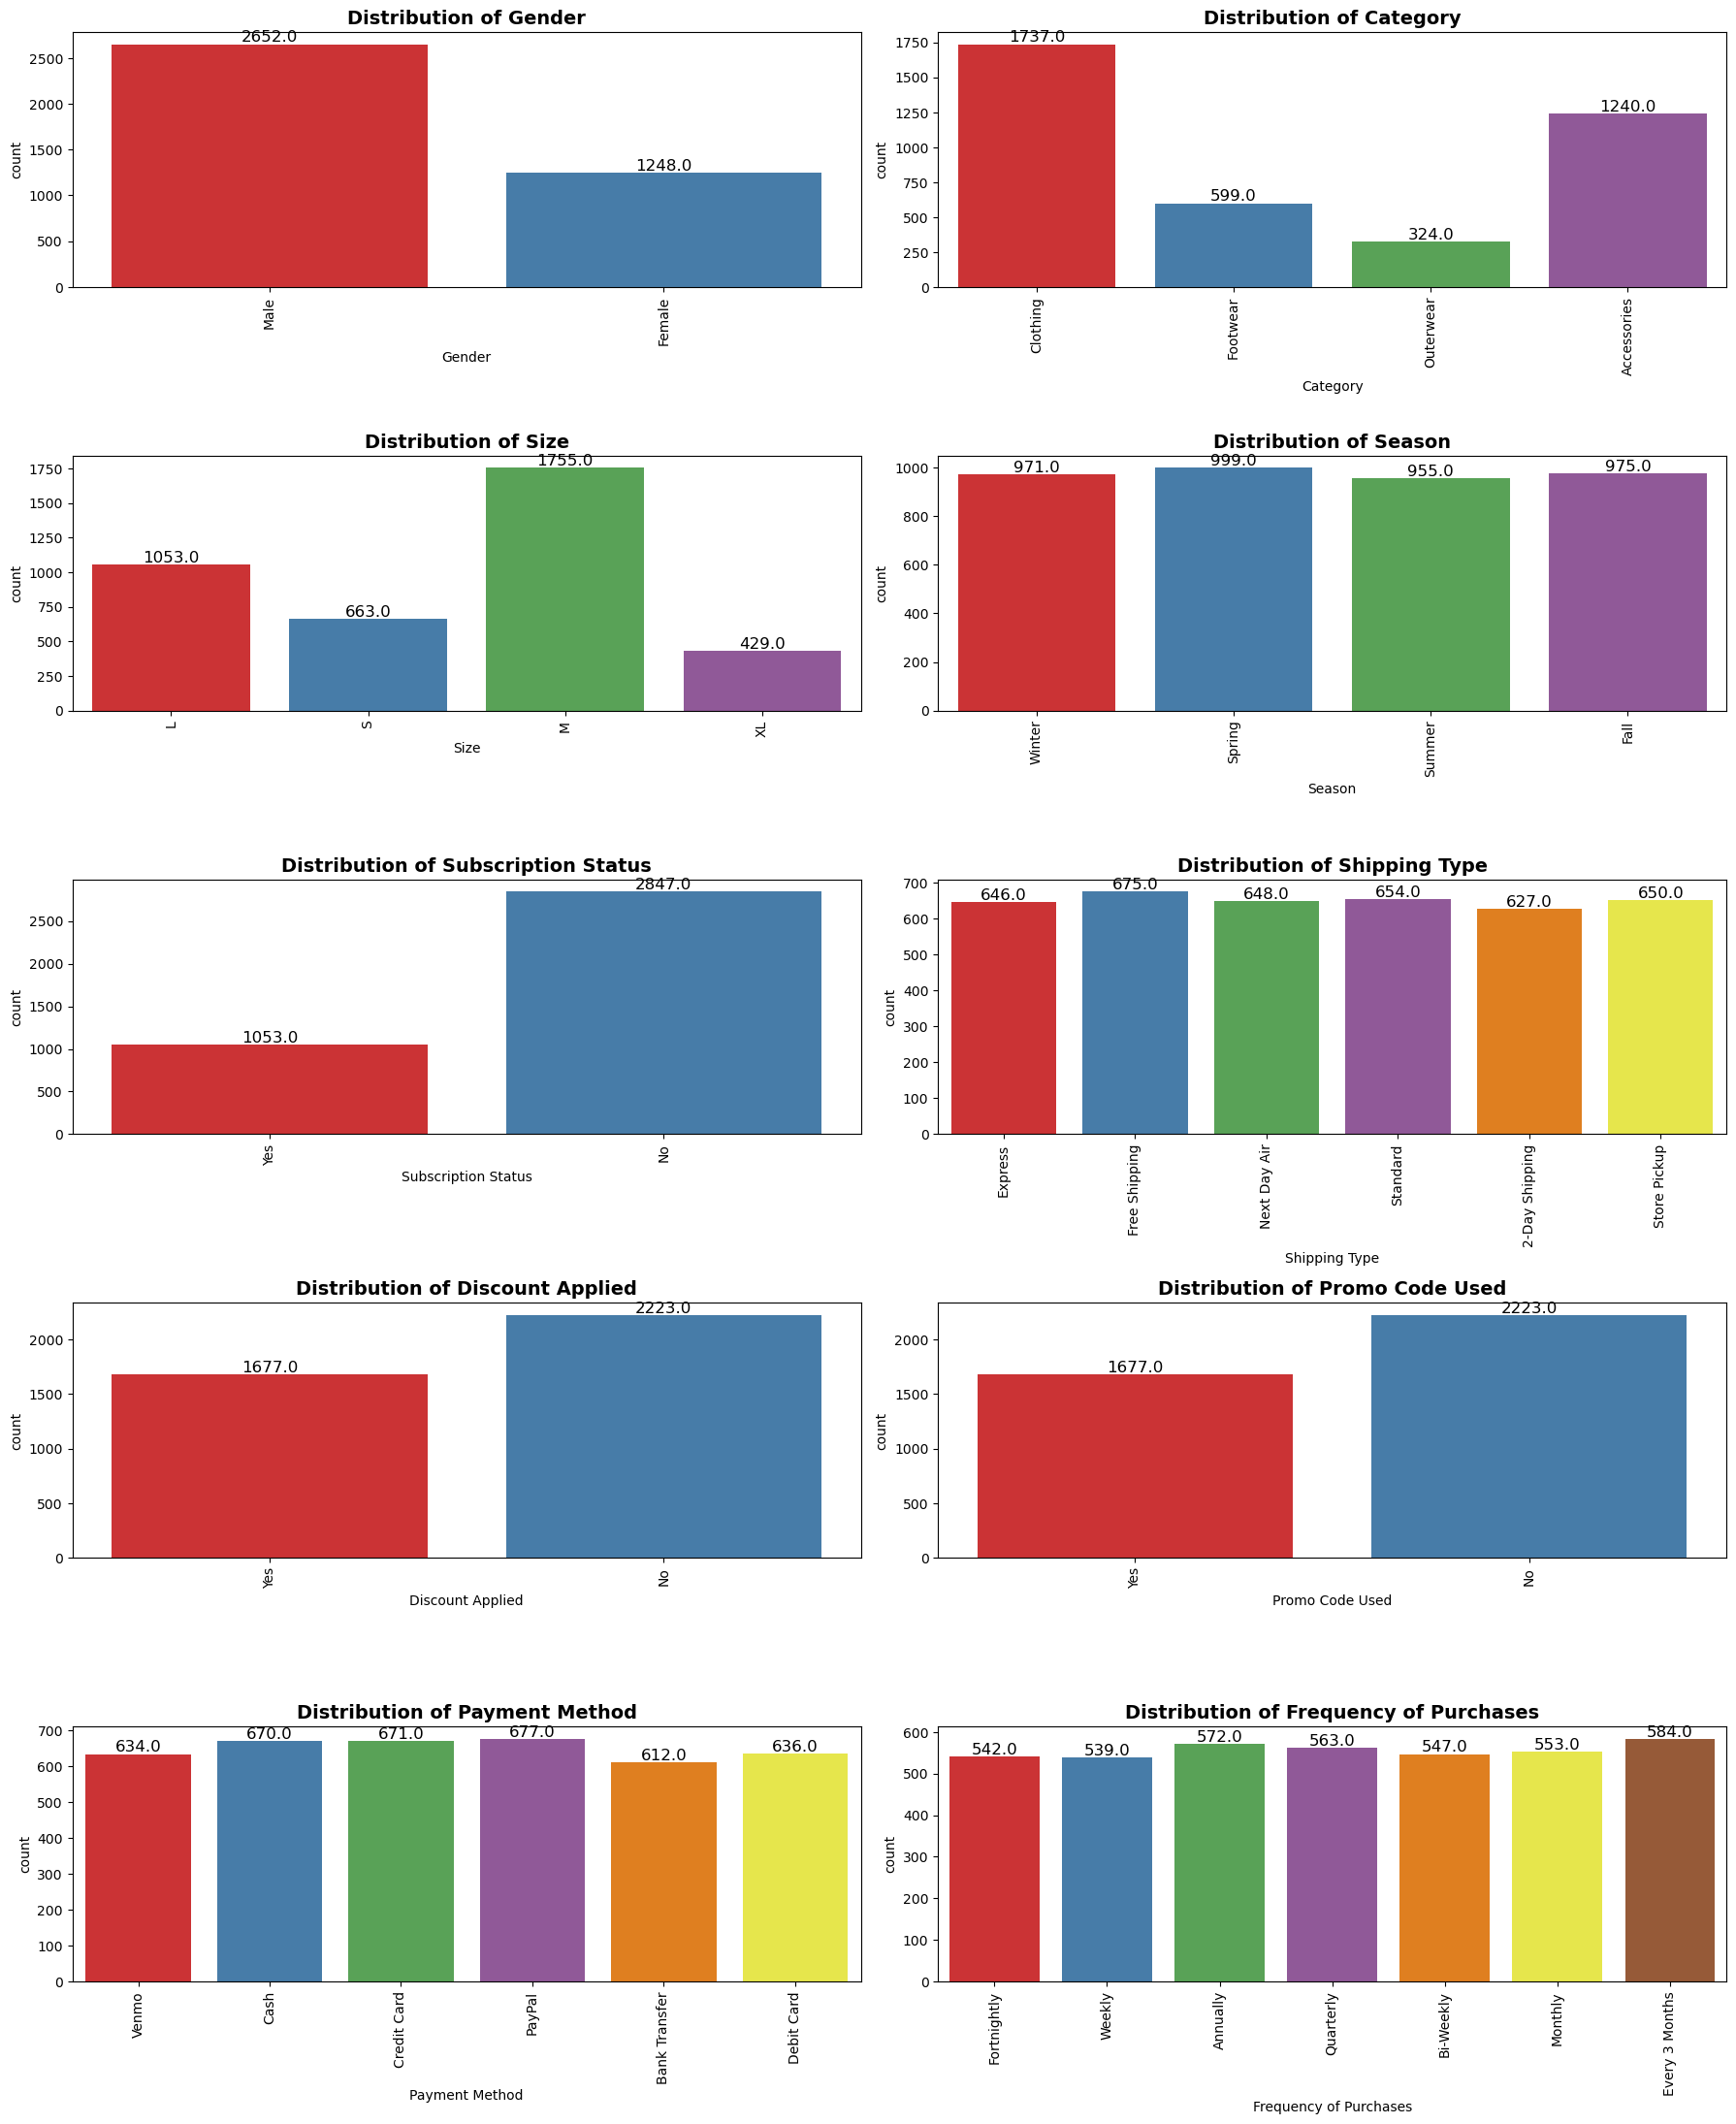

In [24]:
# Distribution of Colors
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, y='Color', palette=color_palette)
plt.title('Distribution of Color', fontsize=16, fontweight='bold')
plt.grid(False)  
plt.show()

# Countplot for remaining categorical columns
categorical_cols = ['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

plt.figure(figsize=(18, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    ax = sns.countplot(data=df, x=col, palette=color_palette)
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90)
    plt.grid(False)  # Remove grid lines

    # Annotate the counts on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
plt.tight_layout()
plt.show()


#### Bivariate Analysis

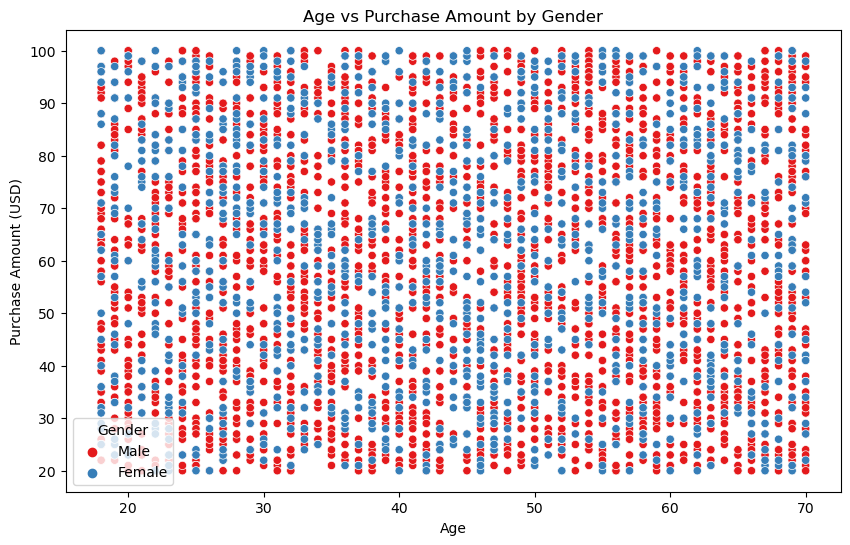

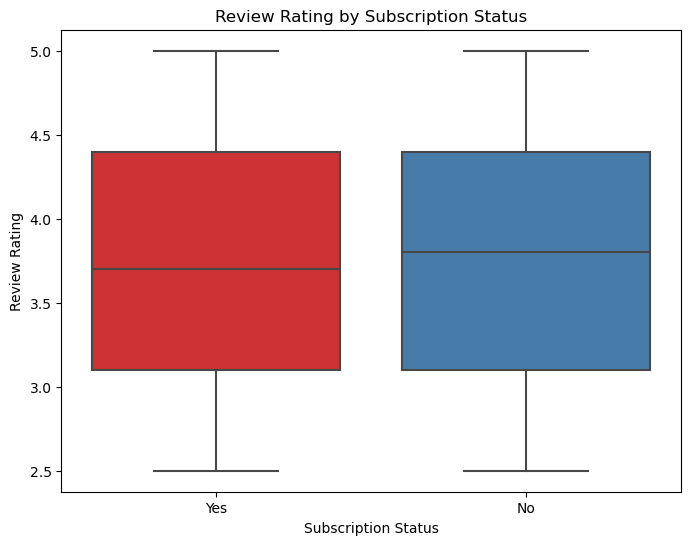

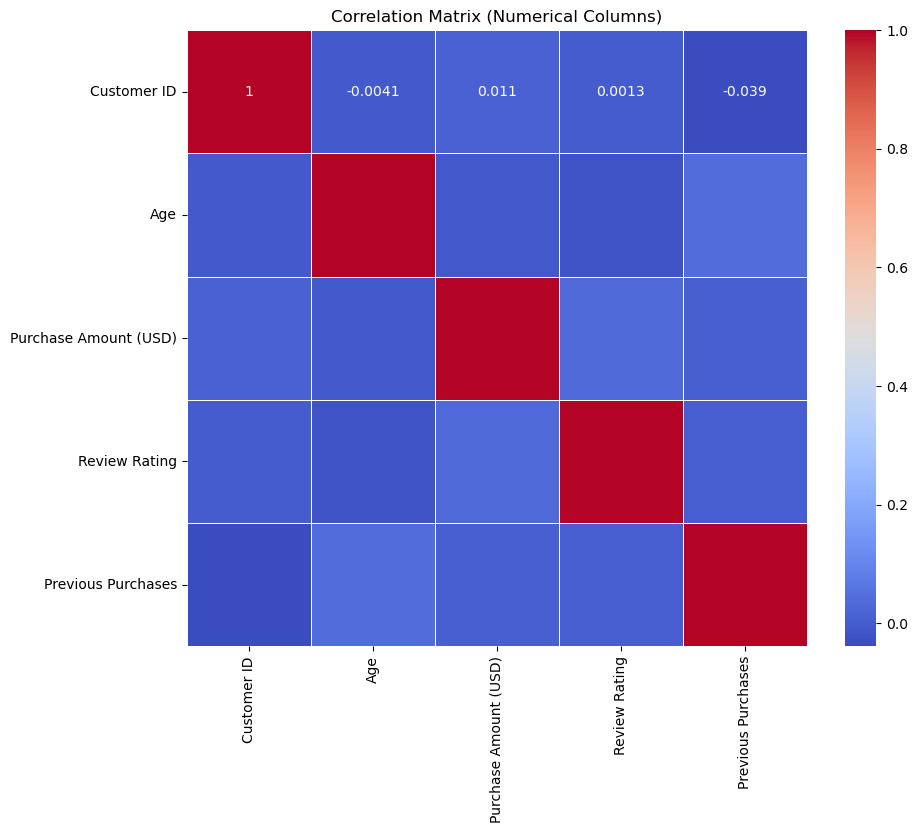

In [26]:
# Age vs Purchase Amount by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Purchase Amount (USD)', hue='Gender', palette='Set1')
plt.title('Age vs Purchase Amount by Gender')
plt.show()

# Review Rating by Subscription Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Subscription Status', y='Review Rating', palette='Set1')
plt.title('Review Rating by Subscription Status')
plt.show()

# Correlation between numerical columns
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numerical Columns)')
plt.show()

#### Multivariate Analysis

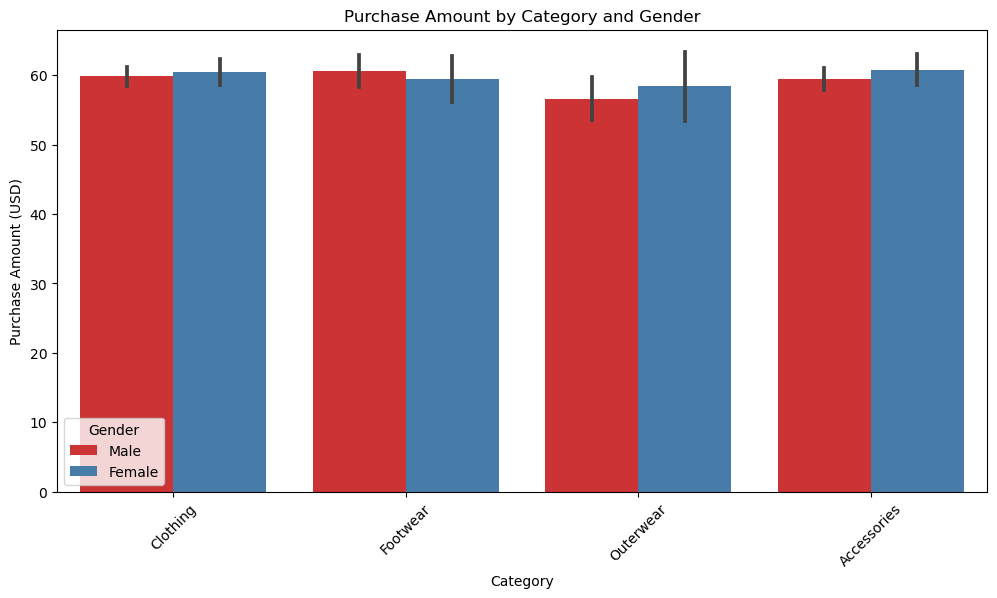

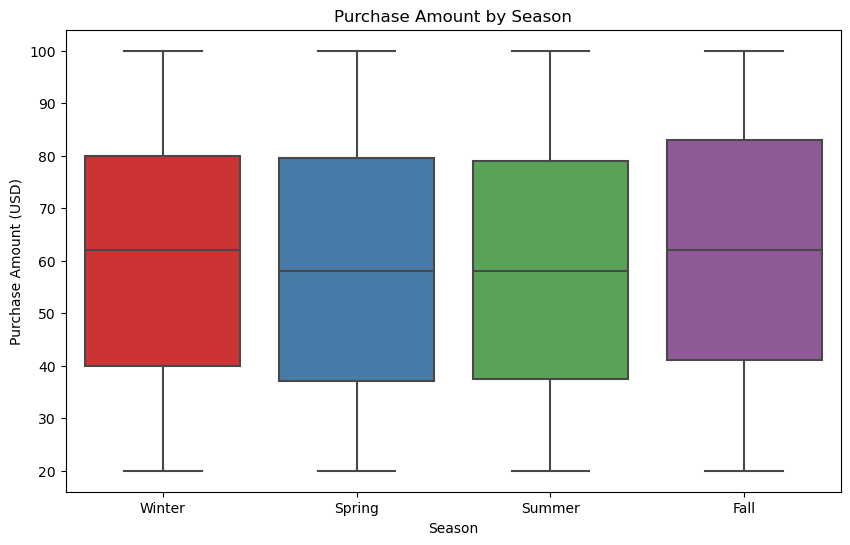

In [25]:
# Analyzing Purchase Amount by Category and Gender
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', hue='Gender', palette='Set1')
plt.title('Purchase Amount by Category and Gender')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Purchase Amount by Season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Purchase Amount (USD)', palette='Set1')
plt.title('Purchase Amount by Season')
plt.show()
